Karan Vora (kv2154)

ECE-GY 7143 Introduction to Deep Learning, Assignment 1, Question 4

Disclosure:

I have discussed this particular problem with Rithviik Srinivasan (rs8385) and Charmee Mehta (cm6389)

I have also used online resources like StackOverflow, GitHub repos, Kaggle Competition entries, ChatGPT and official pytorch, numpy, matplotlib documentation.

In [26]:
#Import all required libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [30]:
# Load FashionMNIST dataset
TrainDataset = torchvision.datasets.FashionMNIST(root='./FashionMNIST/', train=True, transform=torchvision.transforms.ToTensor(), download=True)
TestDataset = torchvision.datasets.FashionMNIST(root='./FashionMNIST/', train=False, transform=torchvision.transforms.ToTensor(), download=True)

# Define dataloaders
TrainDataLoader = torch.utils.data.DataLoader(TrainDataset, batch_size=64, shuffle=True)
TestDataLoader = torch.utils.data.DataLoader(TestDataset, batch_size=64, shuffle=False)

In [31]:
# Define model 
# As input dimension is 28 x 28, the input layer will have 784 nodes
# The architecture is a 3 layer dense NN with 256, 128, 64 neurons in the hidden layers
# The output is a 10 class classification thus 10 nodes in output.
# We are using ReLU activation for each layer
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = NeuralNetwork().to(device)

In [32]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
# Train model
train_losses = []
test_losses = []
num_epochs = 20

In [35]:
# Running the epochs and training the network, Calculating the loss.

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for images, labels in TrainDataLoader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
    train_loss = train_loss / len(TrainDataLoader.dataset)
    train_losses.append(train_loss)

    with torch.no_grad():
        for images, labels in TestDataLoader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item() * images.size(0)
        test_loss = test_loss / len(TestDataLoader.dataset)
        test_losses.append(test_loss)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tTest Loss: {:.6f}'.format(epoch+1, train_loss, test_loss))

Epoch: 1 	Training Loss: 0.546322 	Test Loss: 0.415558
Epoch: 2 	Training Loss: 0.377236 	Test Loss: 0.445570
Epoch: 3 	Training Loss: 0.340729 	Test Loss: 0.355067
Epoch: 4 	Training Loss: 0.313457 	Test Loss: 0.356937
Epoch: 5 	Training Loss: 0.292774 	Test Loss: 0.347378
Epoch: 6 	Training Loss: 0.279877 	Test Loss: 0.346601
Epoch: 7 	Training Loss: 0.265311 	Test Loss: 0.335643
Epoch: 8 	Training Loss: 0.255733 	Test Loss: 0.321906
Epoch: 9 	Training Loss: 0.242337 	Test Loss: 0.327425
Epoch: 10 	Training Loss: 0.233854 	Test Loss: 0.365484
Epoch: 11 	Training Loss: 0.224996 	Test Loss: 0.319899
Epoch: 12 	Training Loss: 0.216542 	Test Loss: 0.387408
Epoch: 13 	Training Loss: 0.209370 	Test Loss: 0.339271
Epoch: 14 	Training Loss: 0.201021 	Test Loss: 0.343956
Epoch: 15 	Training Loss: 0.196199 	Test Loss: 0.357778
Epoch: 16 	Training Loss: 0.188847 	Test Loss: 0.344070
Epoch: 17 	Training Loss: 0.181367 	Test Loss: 0.351023
Epoch: 18 	Training Loss: 0.176534 	Test Loss: 0.342519
E

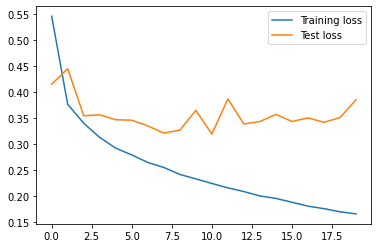

In [36]:
# Plot loss curves
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

In [37]:
# Evaluate model
correct = 0
total = 0
with torch.no_grad():
    model.eval()
    for images, labels in TestDataLoader:
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy: {:.2f}%'.format(correct / total * 100))
    model.train()

Test Accuracy: 89.28%


In [38]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [39]:
# Choose 3 random images from the test dataset
num_images = 3
images, labels = next(iter(TestDataLoader))
images, labels = images[:num_images], labels[:num_images]
images, labels = images.to(device), labels.to(device)

In [40]:
# Make predictions and get predicted class probabilities
model.eval()
outputs = model(images)
probs = torch.softmax(outputs, dim=1)
predicted_classes = torch.argmax(probs, dim=1)

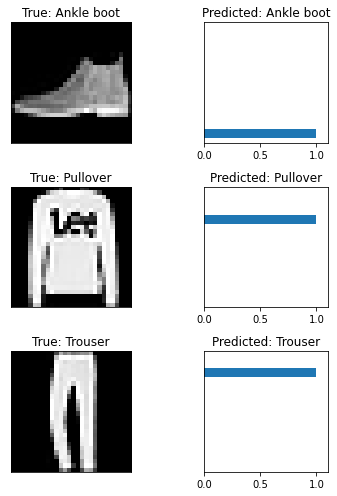

In [41]:
# Visualize images and predicted class probabilities
with torch.no_grad():
  fig, axs = plt.subplots(nrows=num_images, ncols=2, figsize=(6, 7))
  for i in range(num_images):
      img = np.transpose(images[i].cpu().numpy(), (1, 2, 0)).squeeze()
      axs[i, 0].imshow(img, cmap='gray')
      axs[i, 0].set_xticks([])
      axs[i, 0].set_yticks([])
      axs[i, 0].set_title('True: {}'.format(class_names[labels[i]]))
      axs[i, 1].barh(np.arange(len(class_names)), probs[i].cpu().numpy())
      axs[i, 1].set_aspect(0.1)
      axs[i, 1].set_yticks([])
      axs[i, 1].set_xlim([0, 1.1])
      axs[i, 1].invert_yaxis()
      axs[i, 1].set_title('Predicted: {}'.format(class_names[predicted_classes[i]]))
  plt.tight_layout()
  plt.show()